In [1]:
import pandas as pd
import seaborn as sns
from mido import Message, MidiFile, MidiTrack, MetaMessage
from music21 import converter, corpus, instrument, midi, note, chord, pitch, converter, interval
import os
from helper_functions import get_file_and_dirnames
from analysis_functions import analyse_data_folder
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

#PATH_ANALYSIS = "../0_data/2_analysis"
#PATH_MELODY_EXTRACTED = "../0_data/3_melody_sets"
PATH_TRANSPOSED = "../0_data/4_preprocessed_sets"

In [3]:
dir = "17_POP909-Dataset-master"
df = analyse_data_folder(f"{PATH_TRANSPOSED}/c)_transposed_octave/{dir}", compute_metrics=False)
df

100%|██████████| 800/800 [04:08<00:00,  3.22it/s]


,name,type,length_sec,ticks_per_beat,track_count,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,key,...,vel_lowest,vel_highest,vel_avg,vel_same,duration_lowest,duration_highest,duration_avg,monophonic,overlap,error
0,564.mid,1,223.26,1024,2,4.0,4.0,24.0,8.0,0,...,90.0,119.0,109.0,False,0.083008,33.500000,0.454839,False,True,False
1,216.mid,1,227.89,1024,2,4.0,4.0,24.0,8.0,0,...,59.0,116.0,97.0,False,0.000977,15.000000,0.471889,False,True,False
2,558.mid,1,202.21,1024,2,4.0,4.0,24.0,8.0,0,...,94.0,120.0,115.0,False,0.000977,37.416992,0.360817,False,True,False
3,799.mid,1,185.28,1024,2,1.0,4.0,24.0,8.0,G,...,62.0,122.0,93.0,False,0.083008,25.833008,0.602549,True,True,False
4,014.mid,1,152.68,1024,2,4.0,4.0,24.0,8.0,0,...,104.0,120.0,113.0,False,0.083008,46.083008,0.591132,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,555.mid,1,190.67,1024,2,4.0,4.0,24.0,8.0,0,...,93.0,123.0,115.0,False,0.000977,39.333984,0.452063,False,True,False
796,541.mid,1,256.02,1024,2,4.0,4.0,24.0,8.0,0,...,65.0,88.0,79.0,False,0.166992,7.000000,0.915094,True,True,False
797,569.mid,1,200.75,1024,2,4.0,4.0,24.0,8.0,0,...,88.0,120.0,111.0,False,0.083008,38.500000,0.638451,True,True,False
798,596.mid,1,267.07,1024,2,4.0,4.0,24.0,8.0,0,...,49.0,127.0,99.0,False,0.083008,29.250000,0.556667,True,True,False


In [4]:
col_same_value = []
for column in df.columns:
    if len(df[column].unique()) == 1:
        col_same_value.append(column)
        print(column)
        print(df[column].unique())
        print()
print(col_same_value)
df = df.drop(columns = col_same_value)

type
[1]

ticks_per_beat
[1024]

track_count
[2]

denominator
[4.]

clocks_per_click
[24.]

notated_32nd_notes_per_beat
[8.]

error
[False]

['type', 'ticks_per_beat', 'track_count', 'denominator', 'clocks_per_click', 'notated_32nd_notes_per_beat', 'error']


<AxesSubplot: >

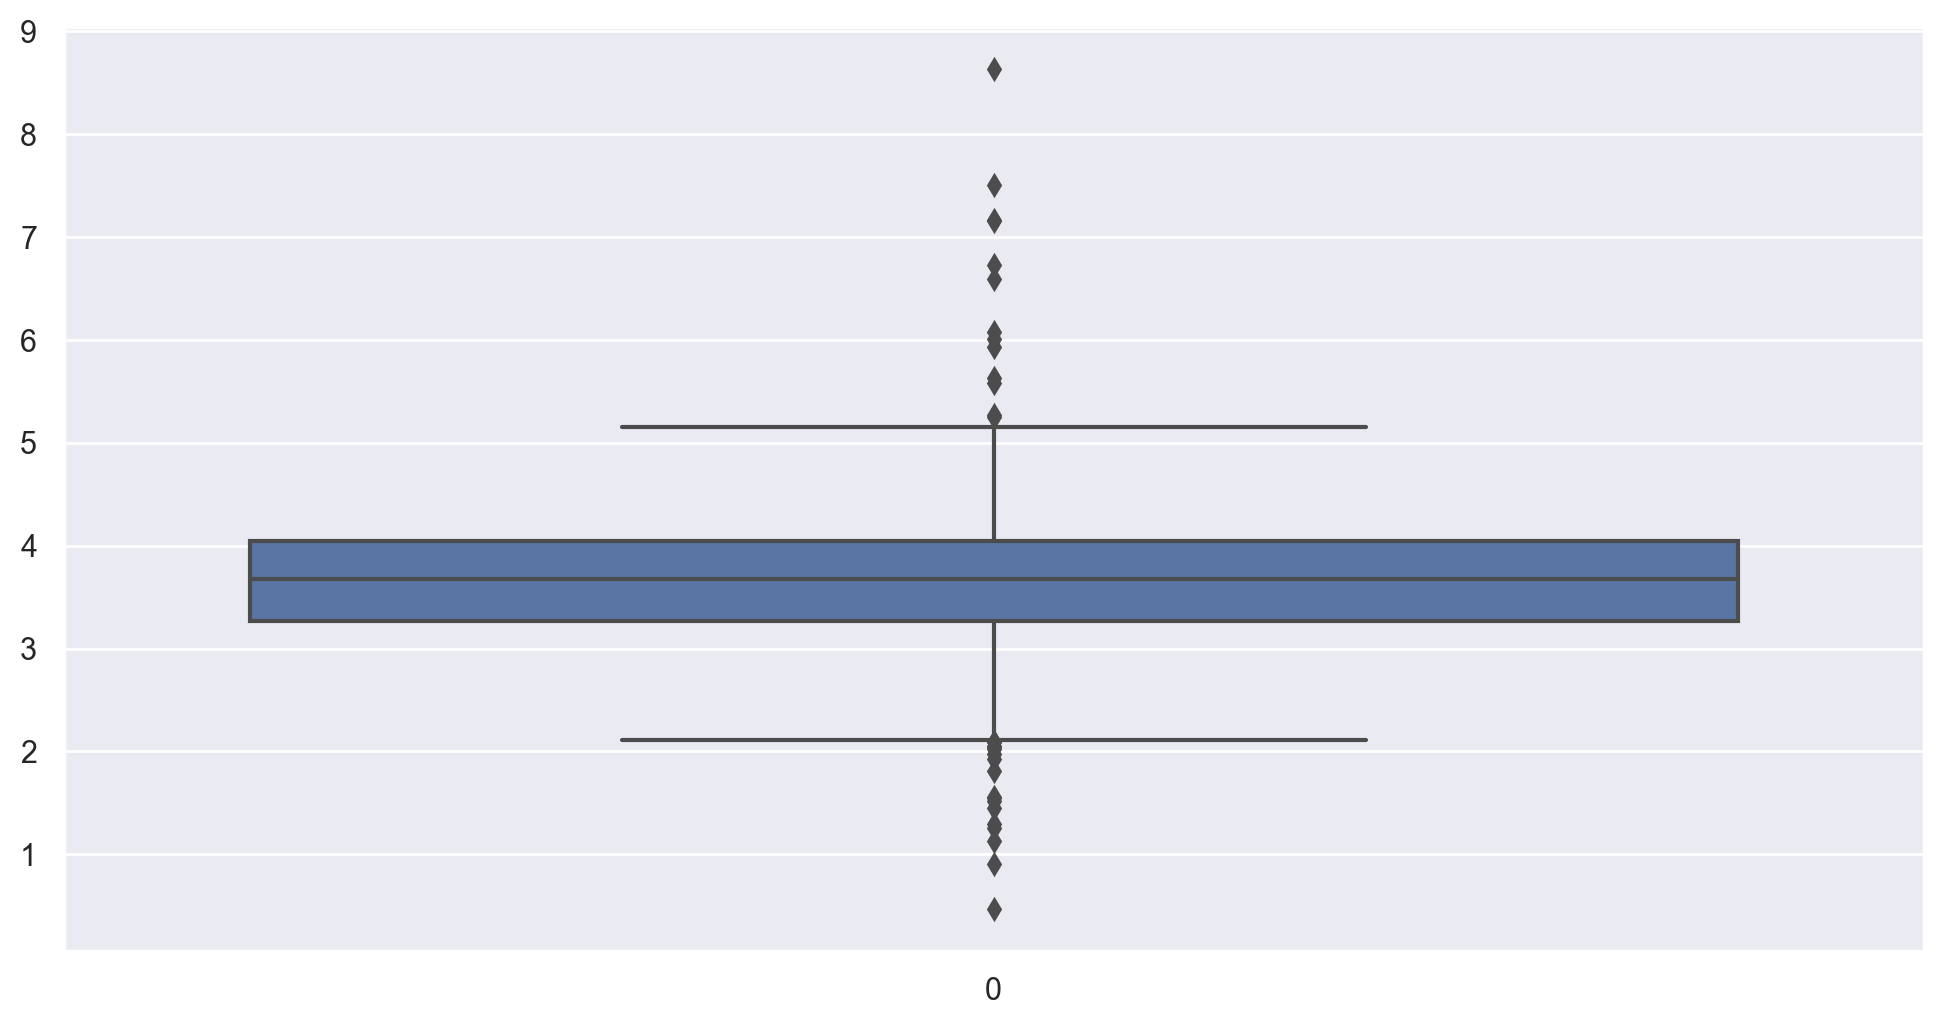

In [5]:
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(df["length_sec"]/60)

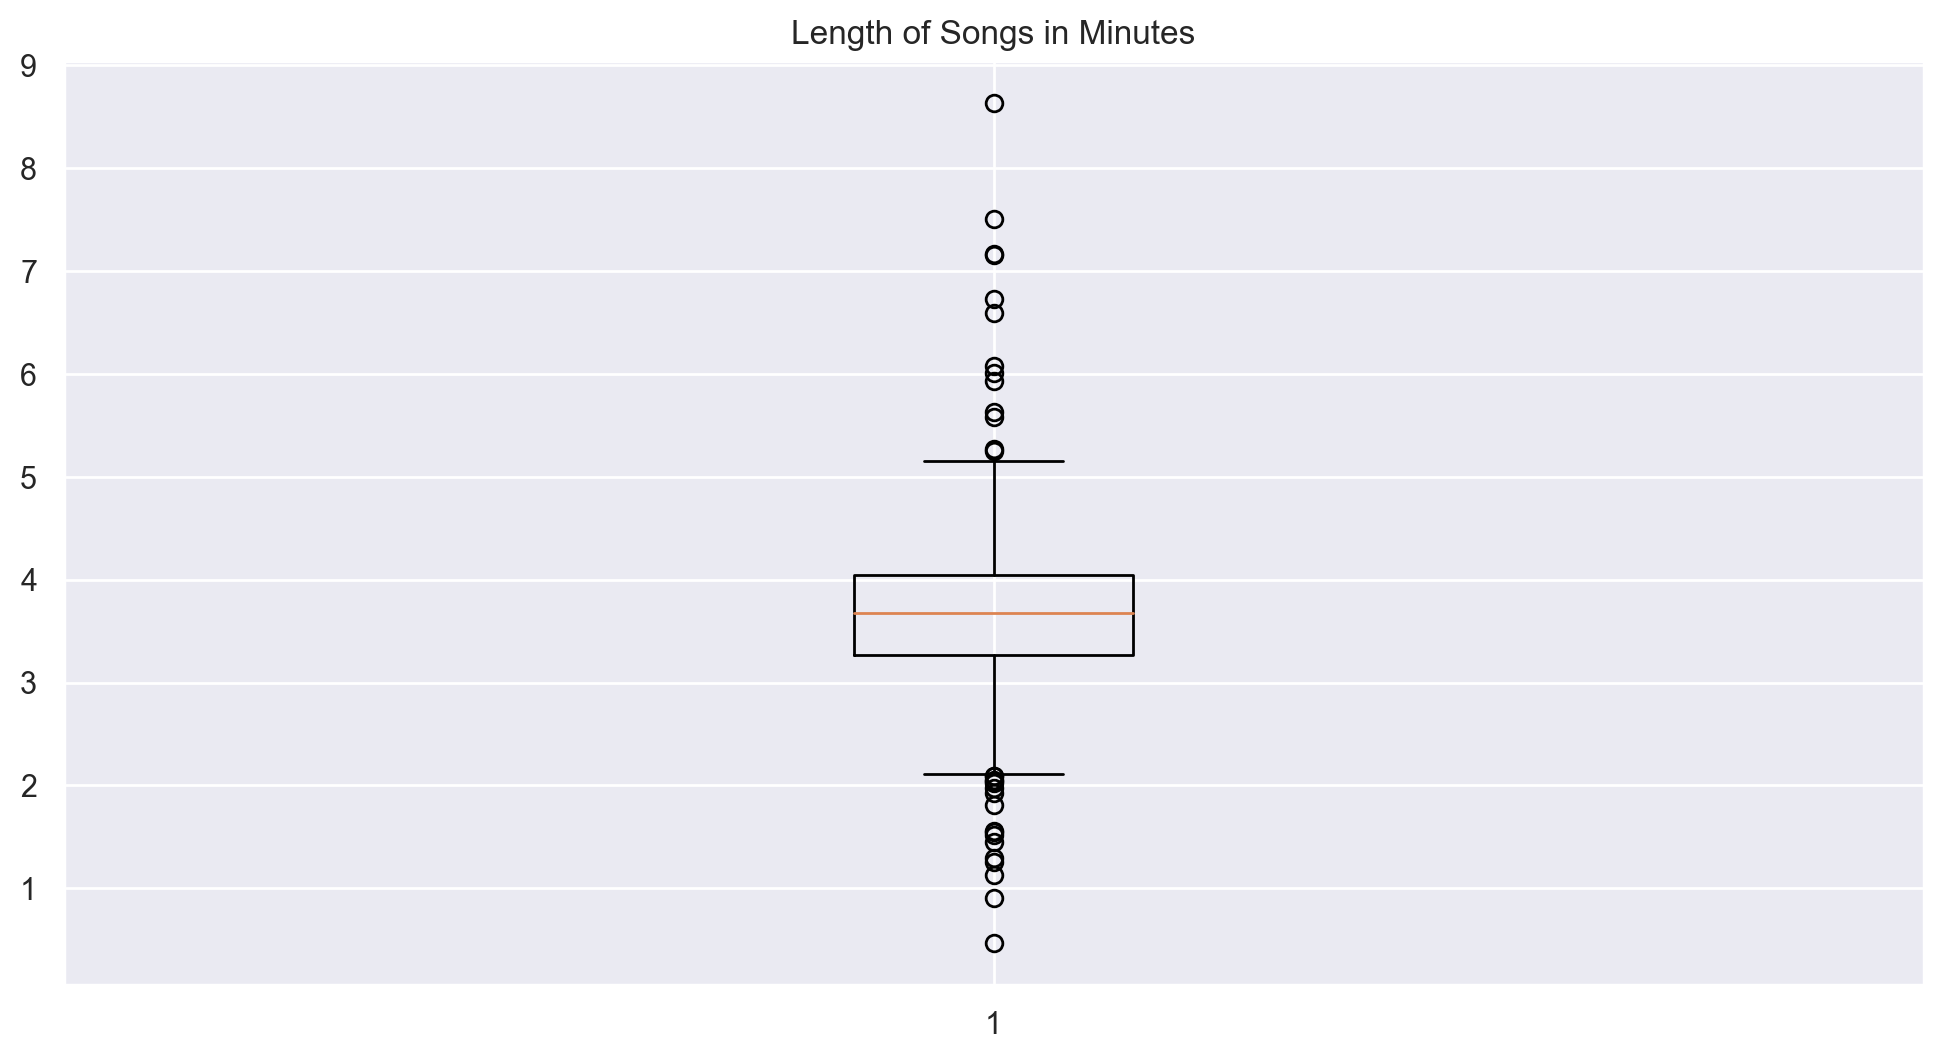

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

#ax.plot(y, color='blue', label='Sine wave')
#ax.plot(z, color='black', label='Cosine wave')
ax.boxplot(df["length_sec"]/60)
ax.set_title("Length of Songs in Minutes")
#ax.set_xlabel('Time')
#ax.set_ylabel('Intensity')
#leg = ax.legend()

plt.show()

In [ ]:
# maybe look at https://www.kaggle.com/code/wfaria/midi-music-data-extraction-using-music21/notebook for furter analysis